<a href="https://colab.research.google.com/github/mmalinda/DS-Core/blob/master/Moringa_Data_Science_Core_W8_Independent_Project_2020_01_MMalinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project - Hypothyroidism Diagnosis

## 1. Defining the Question

### a) Specifying the Question

Nairobi hospital has collected data on hypothyroidism patients a clinical camp, and would like to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism.

### b) Defining the Metric for Success

The model will be successful if it can classify with over 90% accuracy whether a patient is at risk for hypothyroidism or not.

### c) Understanding the context 

Hypothyroidism is usually diagnosed after a physician thoroughly reviews results of a blood test, which shows the levels of different hormones in the blood. The physician takes other risk factors into account and makes a diagnosis based on the level of activity of the thyroid gland. The level of thyrois stimulating hormone (TSH) is the most important marker of thyroid gland activity. Radiation to the neck during cancer treatment and some medicines can affect thyroid activity.

Many symptoms of hypothyroidism are commonly experienced in patients with normal thyroid glad activity, so a tool that considers multiple variables to make a diagnosis would make the process much easier.

### d) Recording the Experimental Design

The data was collected at a clinical camp to test for hypothyroidism.

The steps followed for this analysis were as follows:


1.   Data exploration
2.   Data cleaning
3.   Exploratory data analysis
4.   Building models
5.   Evaluating the models and selecting the best performing ones



### e) Data Relevance

The data provided is suitable and sufficient to build the models.

## 2. Reading the Data

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [0]:
# Loading the Dataset
data = pd.read_csv('http://bit.ly/hypothyroid_data')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
data.shape

(3163, 26)

The data has 3163 records and 26 features.

In [4]:
# Previewing the top of our dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Previewing the bottom of our dataset
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


Null values seem to be showing up as the string '?'. Records with the string '?' will be converted to null values.

In [0]:
# Replacing '?' with null values
data = data.replace('?', np.nan)

In [7]:
# Checking that the replacement worked
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [8]:
# Checking that data is of the correct type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null object
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null object
T3_measured                  3163 non-null object
T3                           2468 non-null 

Columns with numerical data are in the object type in this data set, and will need to be changed to numeric data type.

In [0]:
# Changing columns with numeric data to numeric datatype
cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [10]:
# Confirming that the data type has changed for these columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null float64
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null float64
T3_measured                  3163 non-null object
T3                           2468 non-nul

The data types are now correct.

## 4. External Data Source Validation

In [11]:
# Checking the ranges of values in the dataset
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


A TSH level of above 5 is considered high, so there may be some data entry errors. This is supported by the difference between the last two quartiles. 
However, since the units for measurement are not given, a decision will be made on TSH values over 10 during data cleaning.

## 5. Tidying the Dataset

Decision trees are robust against missing values and outliers, but they will need to be removed for SVM models. A new dataset will be created for cleaning.

In [12]:
# Making a copy of the dataset to clean
df_svm = data.copy()
df_svm.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


First, records with missing data will be removed.

In [13]:
# Identifying the Missing Data
df_svm.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

The data set has many missing values, which will need to be removed before building an SVM model.

In [14]:
# Dropping all records with null values
df_svm.dropna()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40.0,F,f,f,f,f,f,f,f,f,f,f,f,y,70.0,y,0.4,y,3.9,y,0.83,y,5.0,y,28.0
37,hypothyroid,40.0,F,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.3,y,6.6,y,0.93,y,7.0,y,28.0


If all records with null values are dropped, we remain with only 2 records. Perhaps if we delete the TBG columns where most data is missing, deleting records with null values may be more effective.

In [15]:
# Dropping columns with missing data
df_svm = df_svm.drop(columns = ['TBG_measured', 'TBG'])
df_svm.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


In [16]:
# Dropping records with missing values
df_svm = df_svm.dropna()
df_svm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 3162
Data columns (total 24 columns):
status                       2000 non-null object
age                          2000 non-null float64
sex                          2000 non-null object
on_thyroxine                 2000 non-null object
query_on_thyroxine           2000 non-null object
on_antithyroid_medication    2000 non-null object
thyroid_surgery              2000 non-null object
query_hypothyroid            2000 non-null object
query_hyperthyroid           2000 non-null object
pregnant                     2000 non-null object
sick                         2000 non-null object
tumor                        2000 non-null object
lithium                      2000 non-null object
goitre                       2000 non-null object
TSH_measured                 2000 non-null object
TSH                          2000 non-null float64
T3_measured                  2000 non-null object
T3                           2000 non-nul

The 2000 records without missing data are sufficient for building a model.
Next, we will check for outliers. SVM models are not robust against outliers, so they will have to be removed for that purpose.

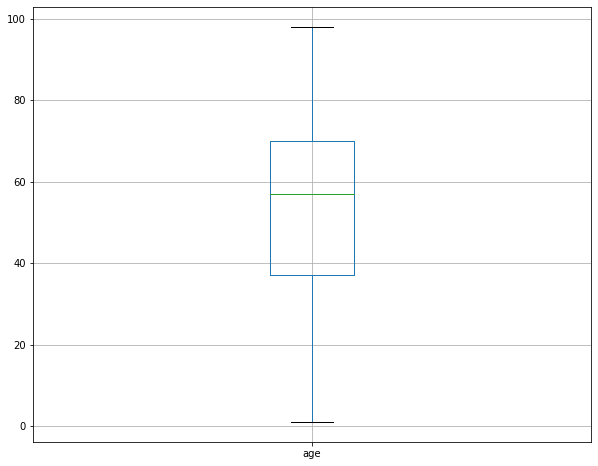

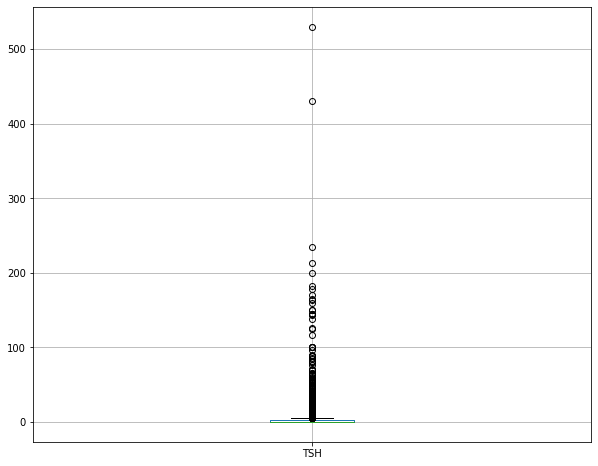

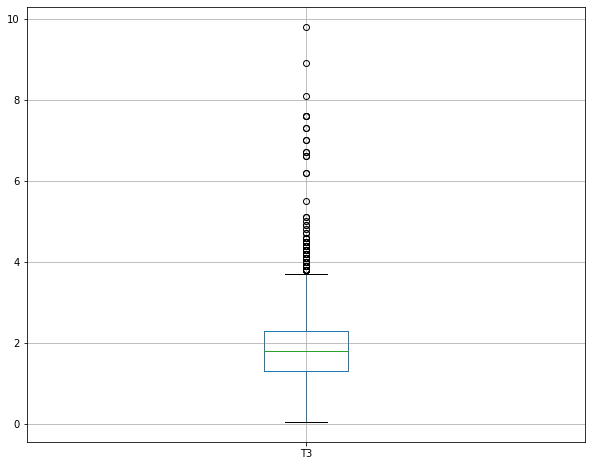

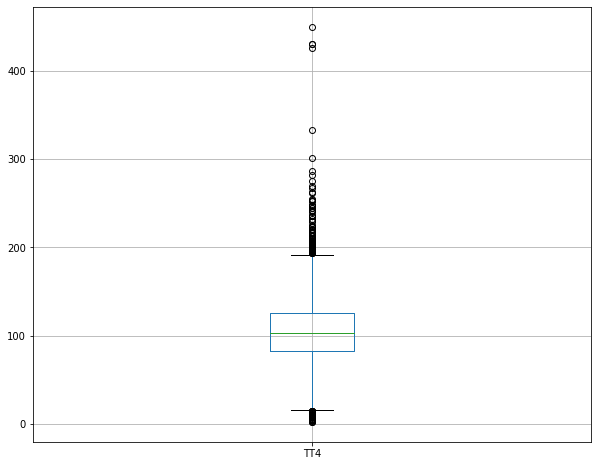

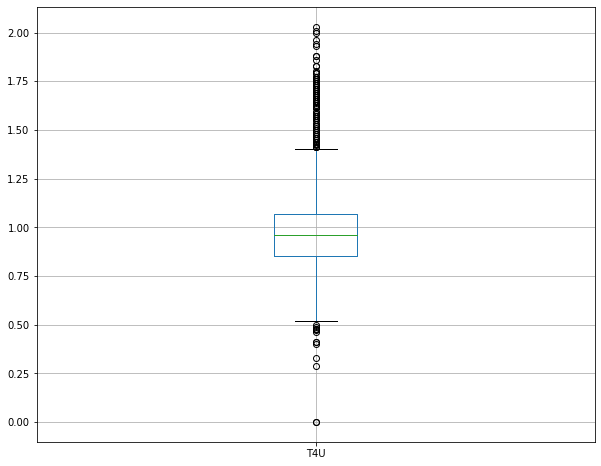

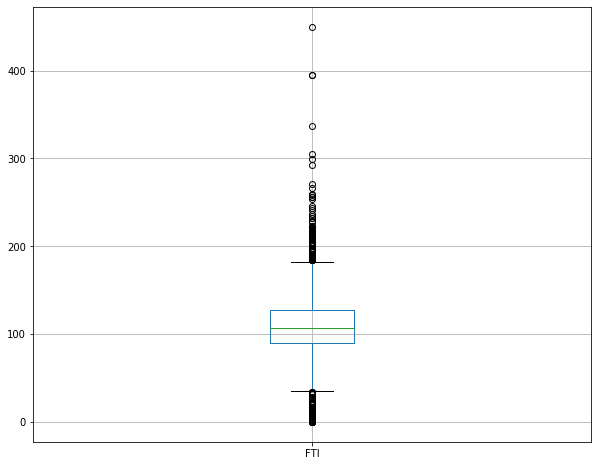

In [17]:
# Checking for outliers using boxplots
num_cols = df_svm[['age', 'TSH',  'T3', 'TT4', 'T4U', 'FTI']]

for col in num_cols:
  plt.figure(figsize = (10, 8))
  df_svm.boxplot([col])

There are many outliers, which will need to be removed for SVM models.

In [0]:
# Removing outliers in columns with numeric data
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce') \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df_svm)

The data can be checked again for extreme outliers.

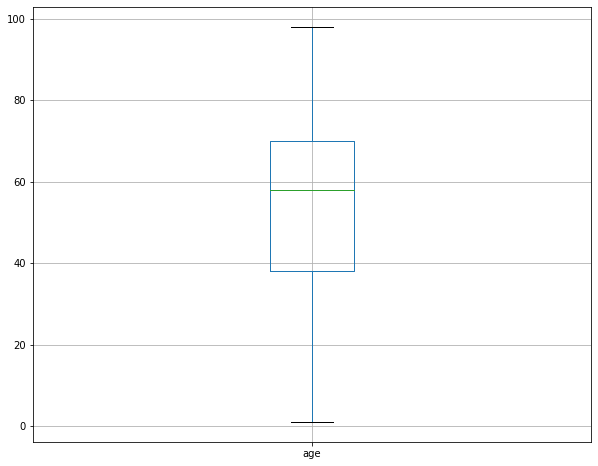

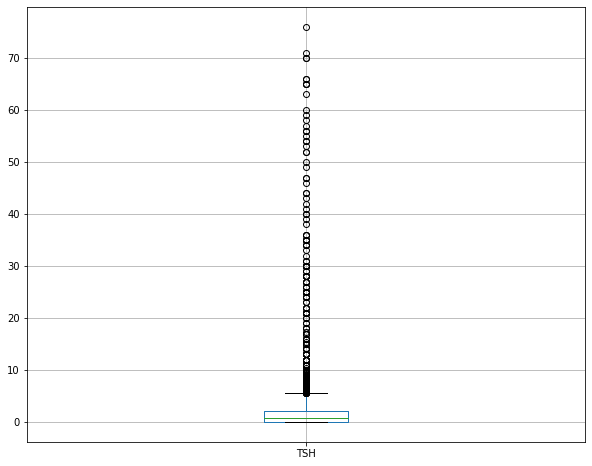

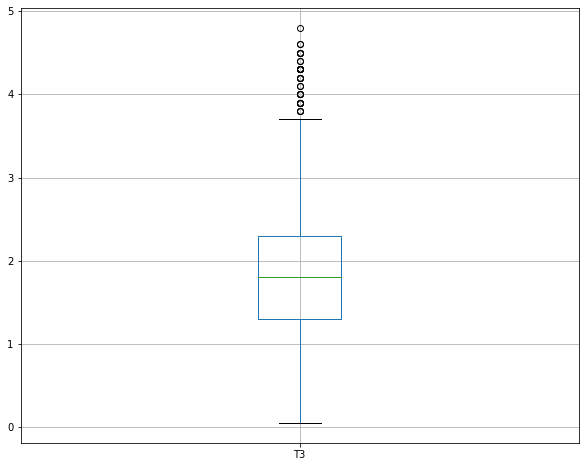

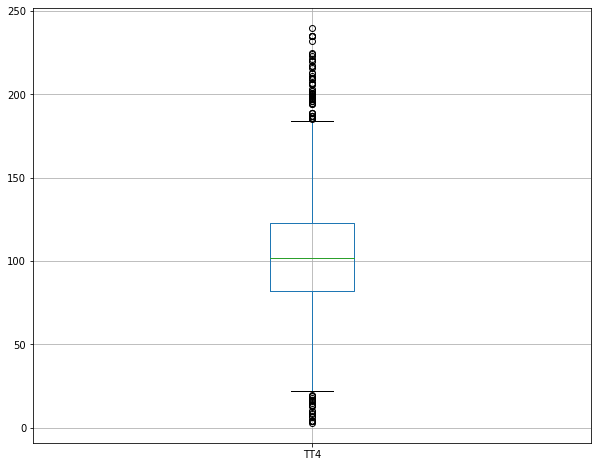

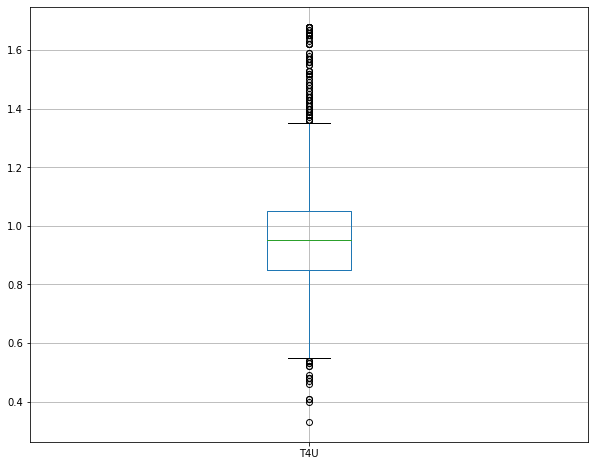

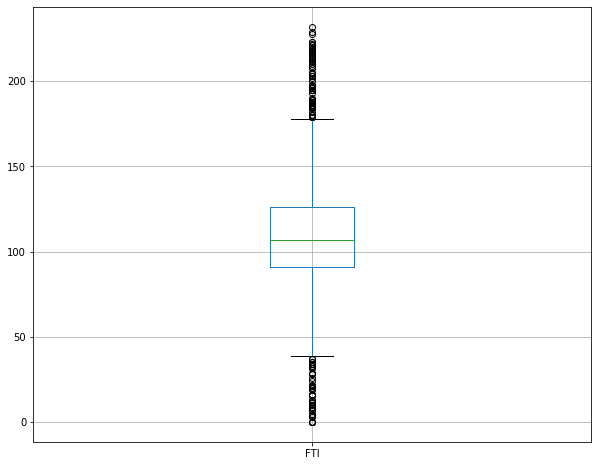

In [19]:
# Checking for outliers using boxplots
num_cols = df_svm[['age', 'TSH',  'T3', 'TT4', 'T4U', 'FTI']]

for col in num_cols:
  plt.figure(figsize = (10, 8))
  df_svm.boxplot([col])

The data seems more balanced now, and can be used for an svm model. More extreme TSH values have also been deleted, and the range is now more acceptable.

In [20]:
# Checking for duplicate values
print(data.duplicated().sum())
print(df_svm.duplicated().sum())

77
47


The duplicates are not too many and hence they can be dropped.

In [0]:
# Dropping the duplicated records
data = data.drop_duplicates()
df_svm = df_svm.drop_duplicates()

In [22]:
# Confirming that the duplicated records were dropped
print(data.duplicated().sum())
print(df_svm.duplicated().sum())

0
0


## 6. Exploratory Analysis

### Univariate summaries

age
Skewness: -0.3359612214026916
Kurtosis: -0.8576393575046528
TSH
Skewness: 4.6511163128379716
Kurtosis: 24.512472329940543
T3
Skewness: 0.5210936964104613
Kurtosis: 0.9024806208971414
TT4
Skewness: 0.5213200528755949
Kurtosis: 1.1465265479496294
T4U
Skewness: 0.8682996742265902
Kurtosis: 2.092995056157024
FTI
Skewness: 0.32378156947530445
Kurtosis: 1.4798834891600459


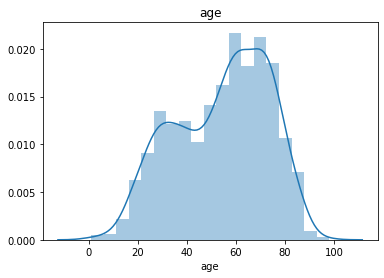

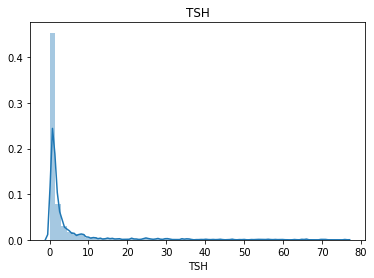

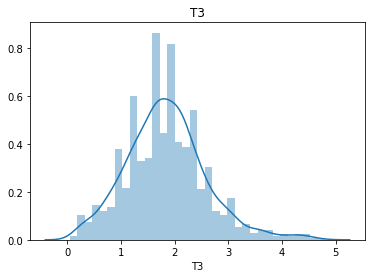

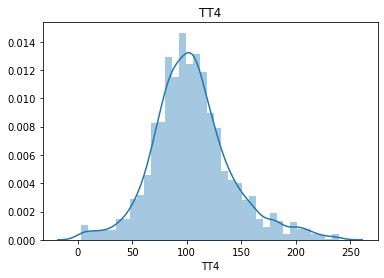

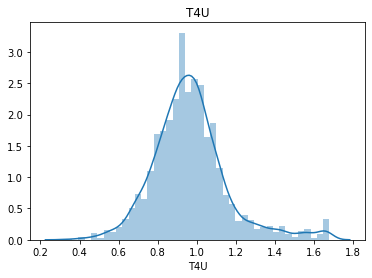

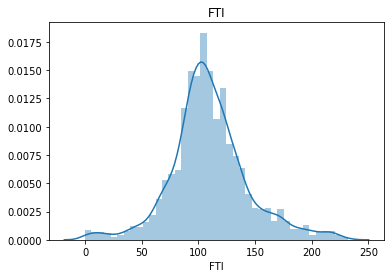

In [23]:
# Plotting univariate summaries for numerical data
num_cols = df_svm.select_dtypes('float64')

for i, col_val in enumerate(num_cols):
  print(col_val)

  plt.figure(i)
  sns.distplot(df_svm[col_val], kde=True)
  plt.title(col_val)
  print("Skewness:", df_svm[col_val].skew())
  print("Kurtosis:", df_svm[col_val].kurt())

According to the plots and skewness and kurtosis, the data will need to be normalized for models that require data with normal distribution. 

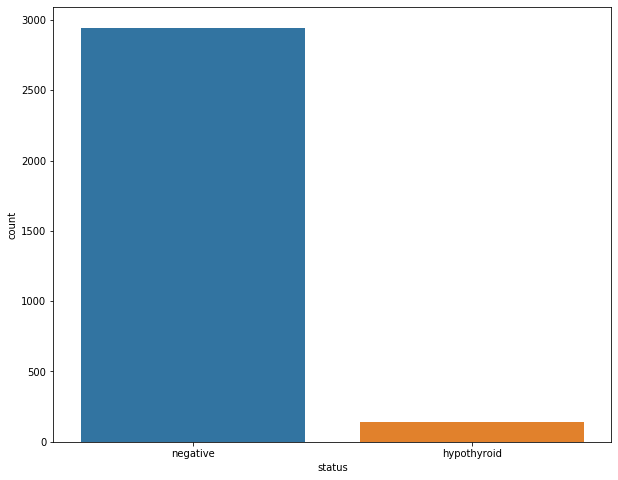

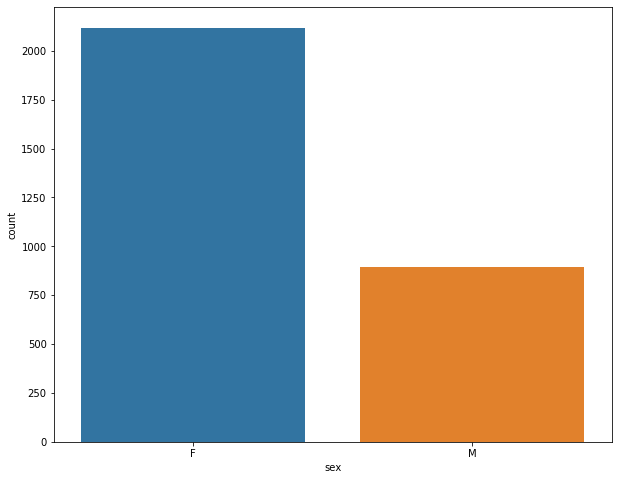

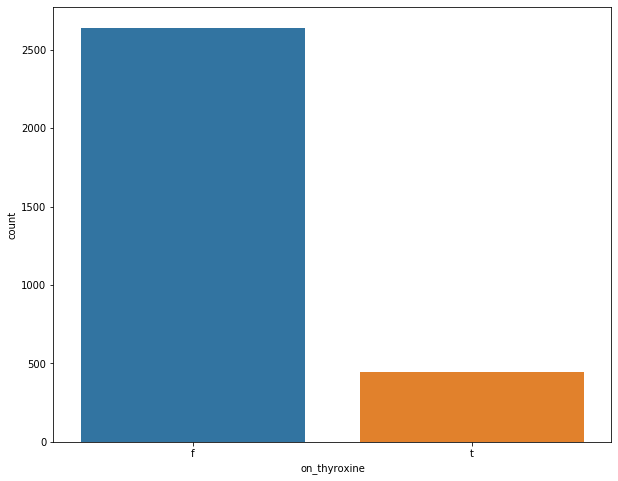

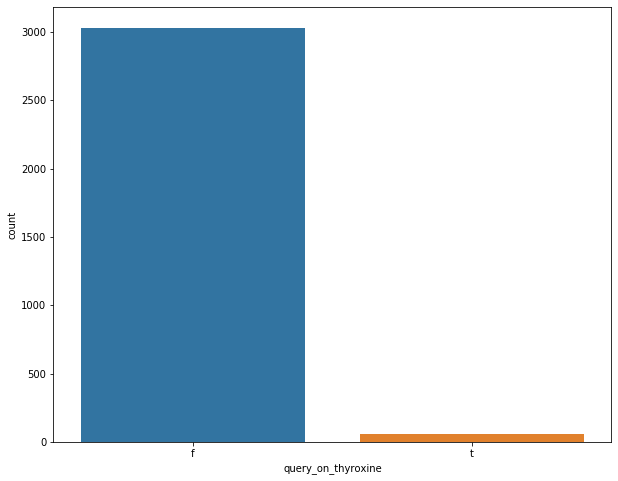

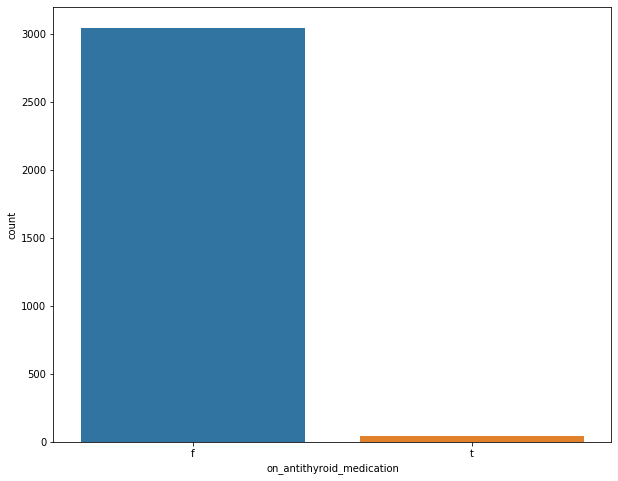

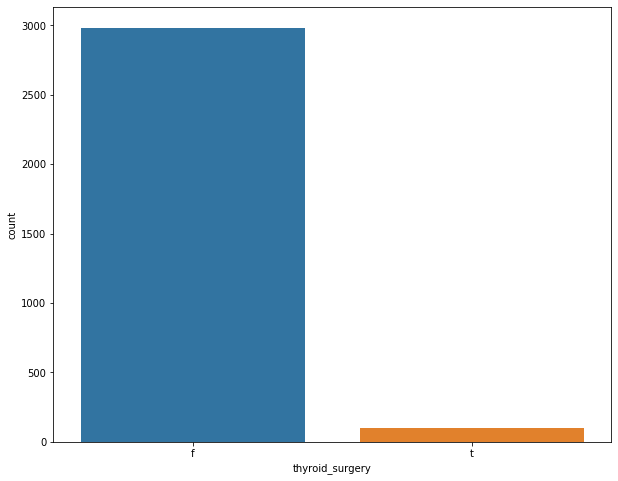

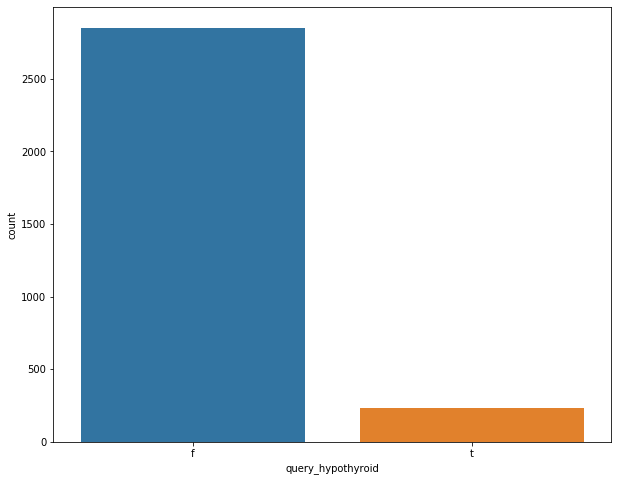

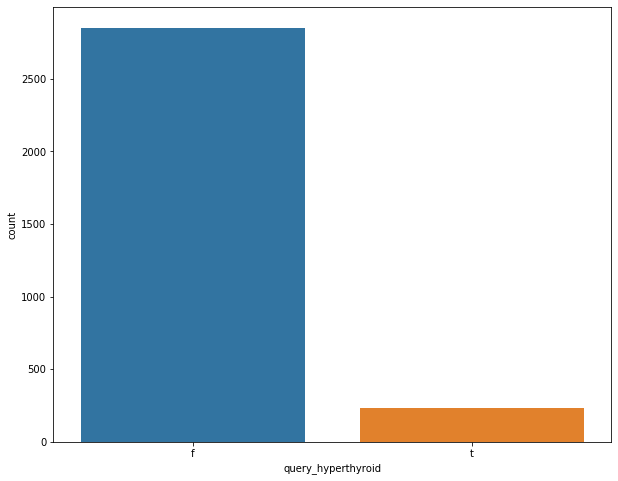

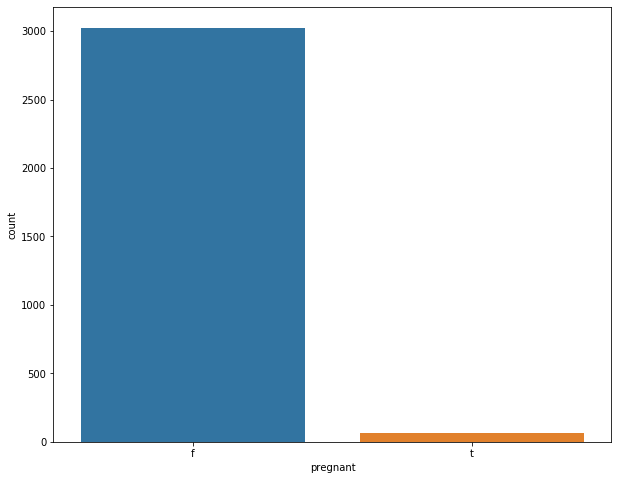

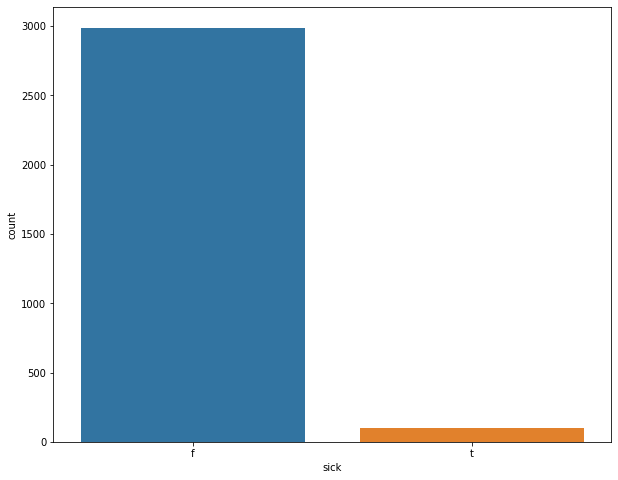

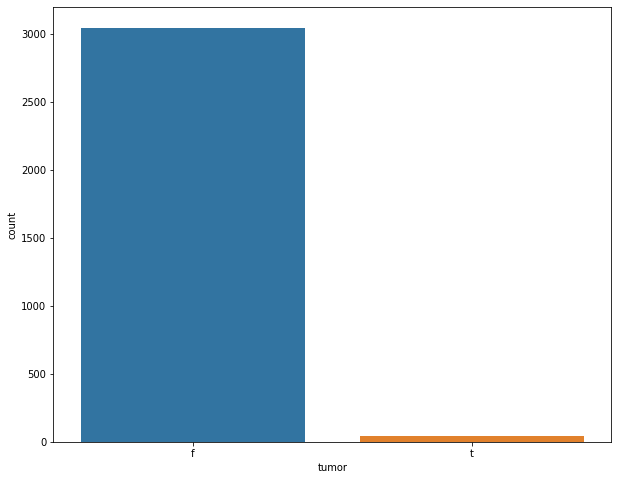

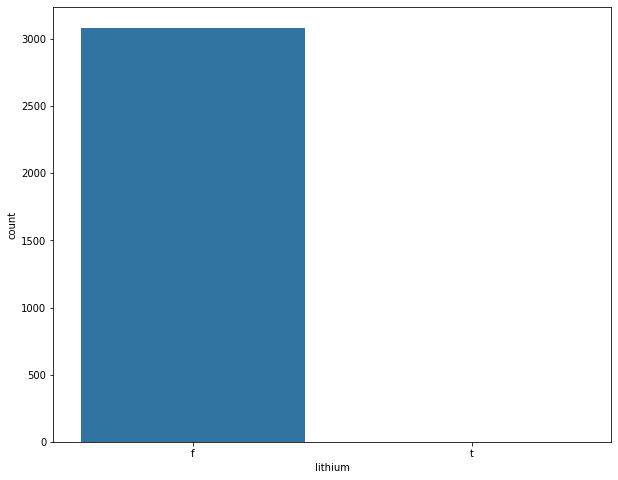

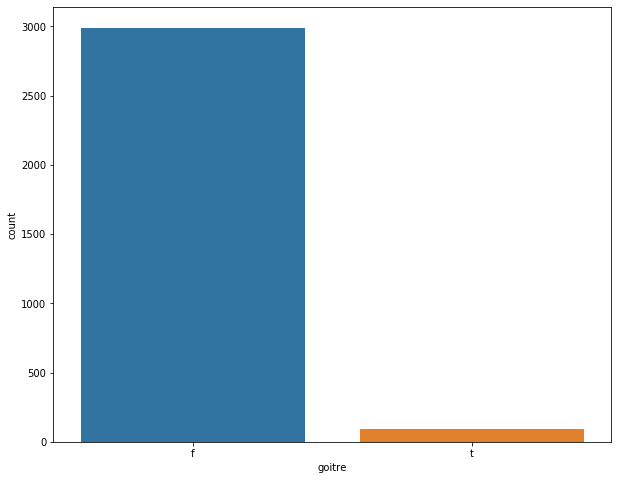

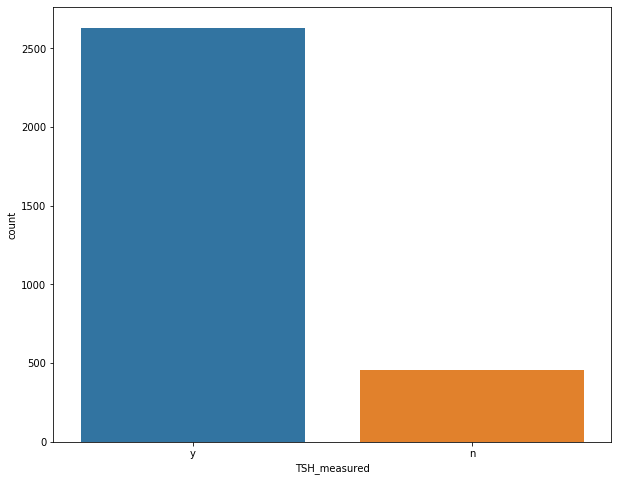

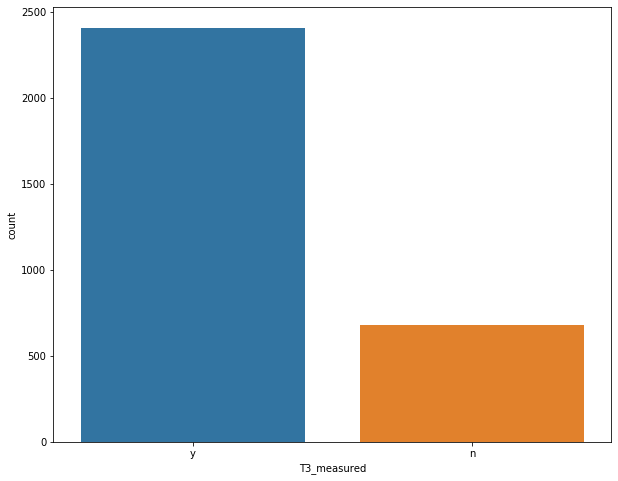

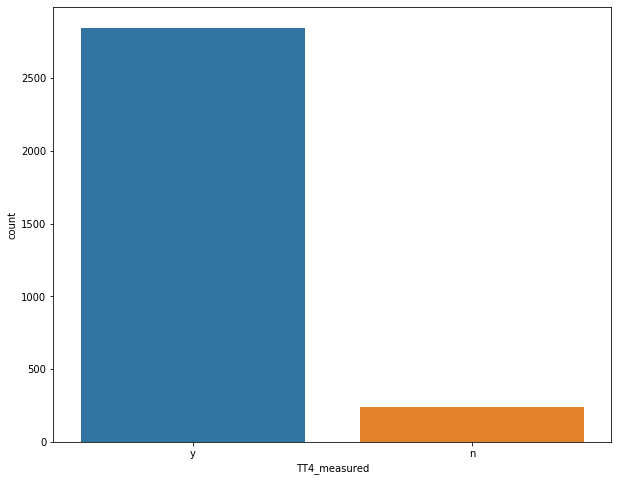

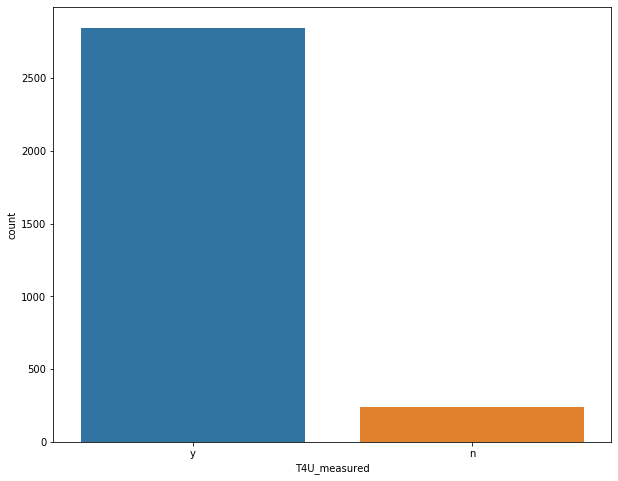

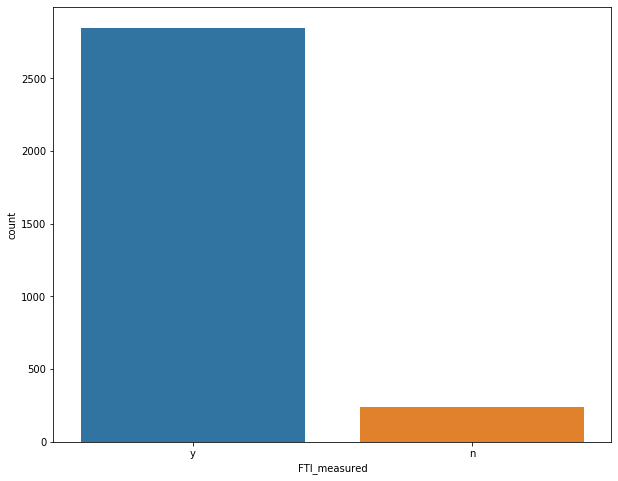

In [24]:
# Visualizing categorical data
cat_cols = df_svm.select_dtypes('object')
for col in cat_cols:
  plt.figure(figsize = (10, 8))
  sns.countplot(x=data[col], order = data[col].value_counts().index)
  

Models will need to be adjusted for imbalanced data.

### Bivariate analysis

<Figure size 432x288 with 0 Axes>

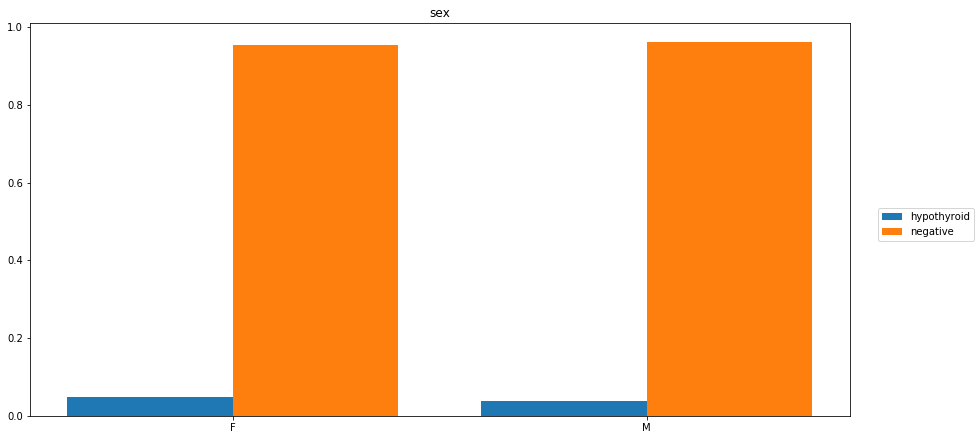

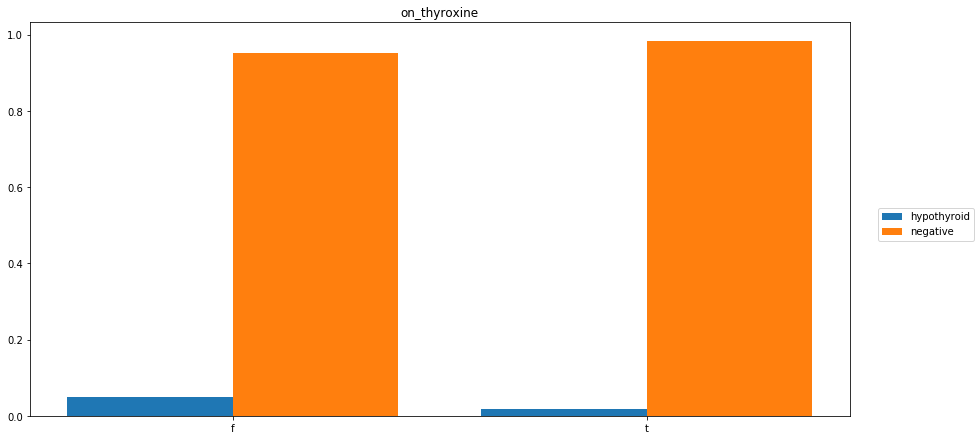

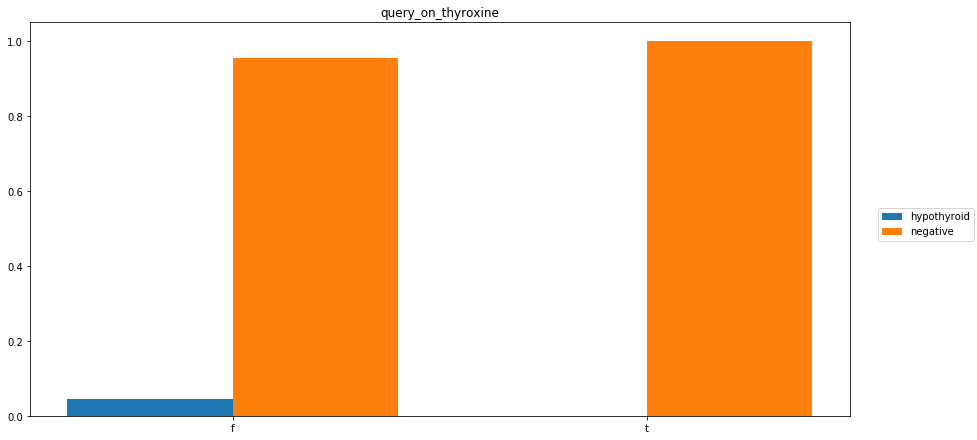

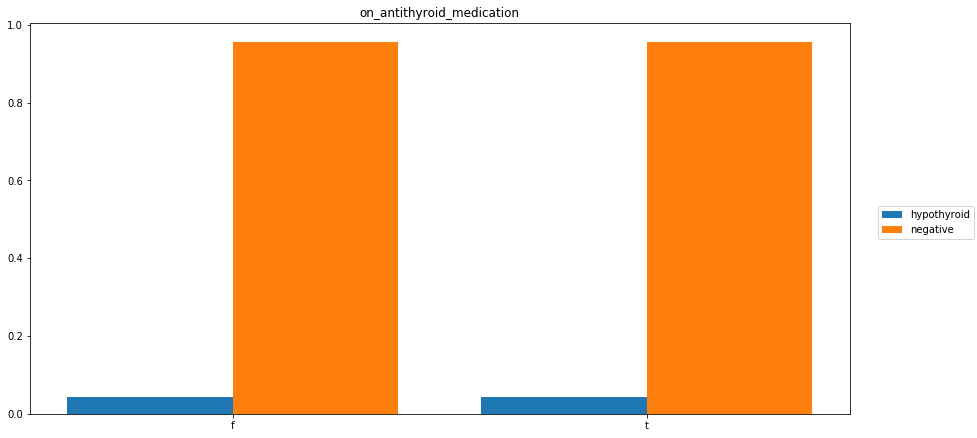

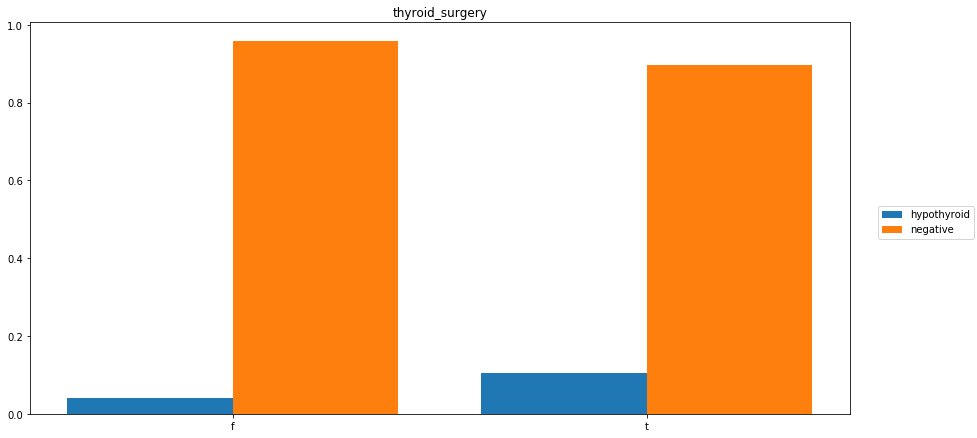

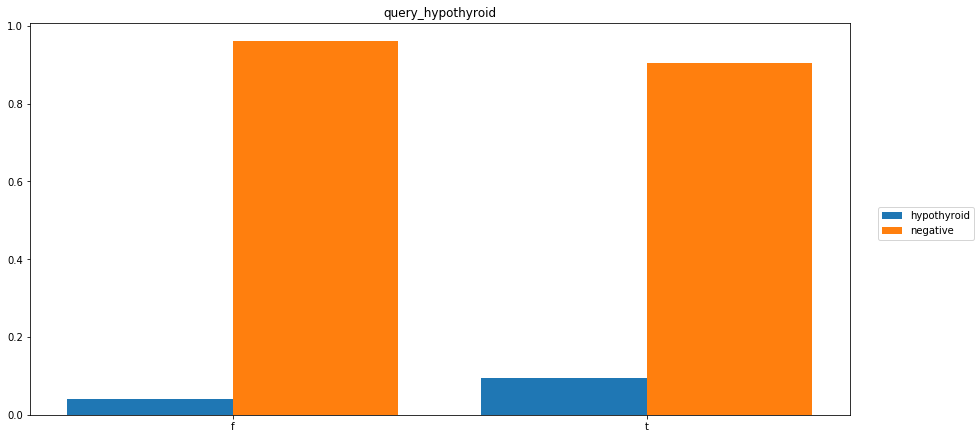

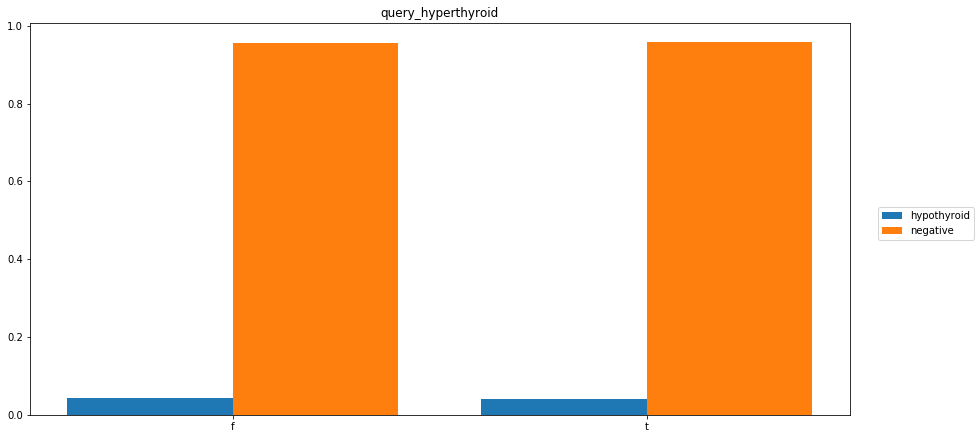

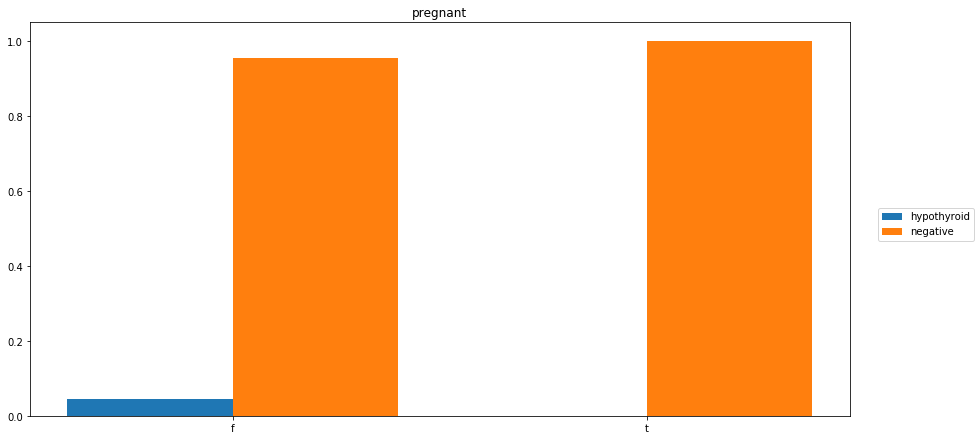

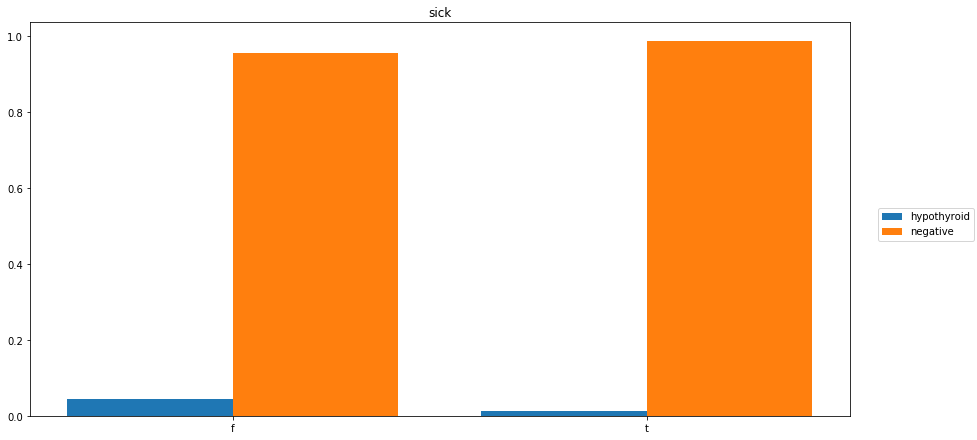

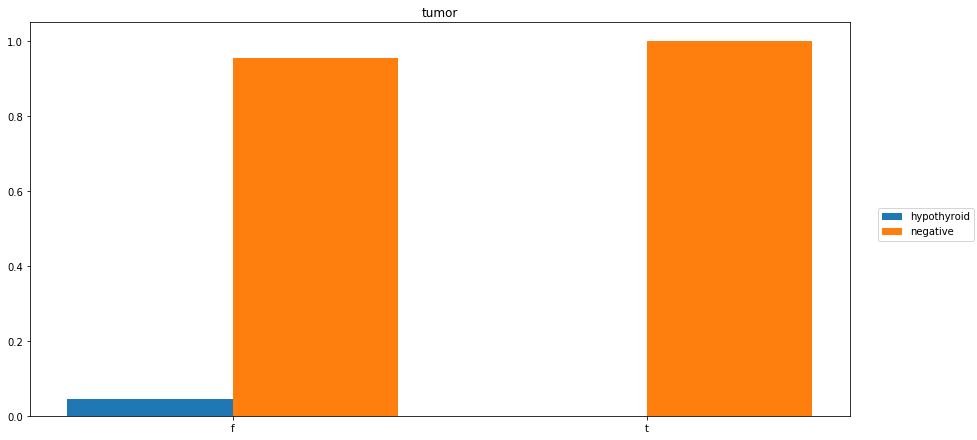

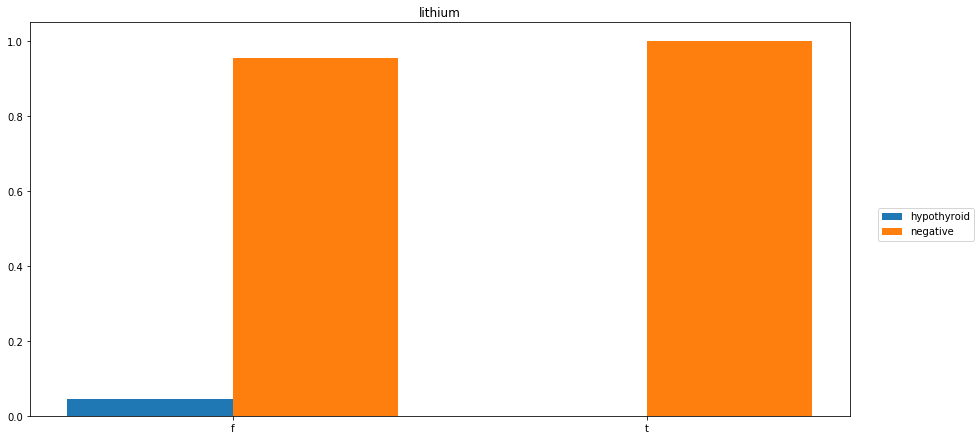

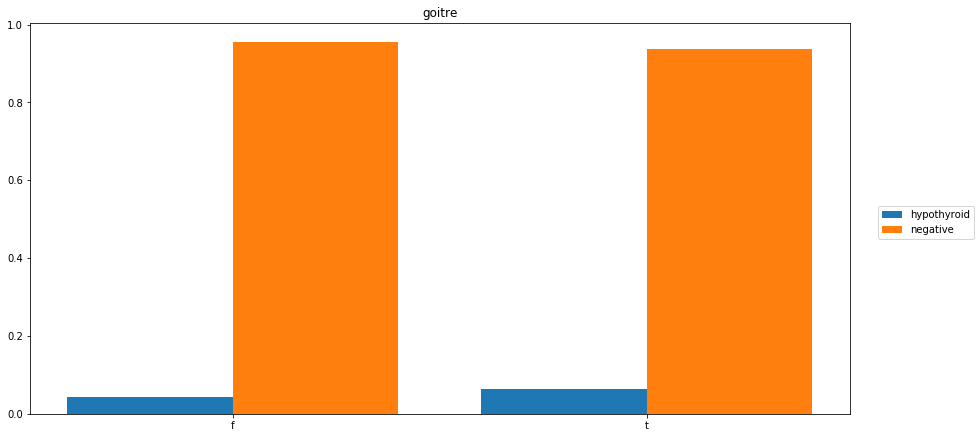

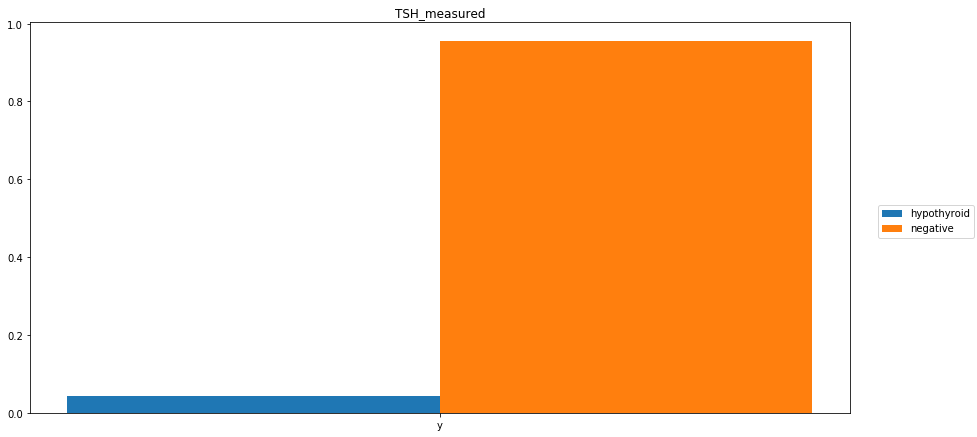

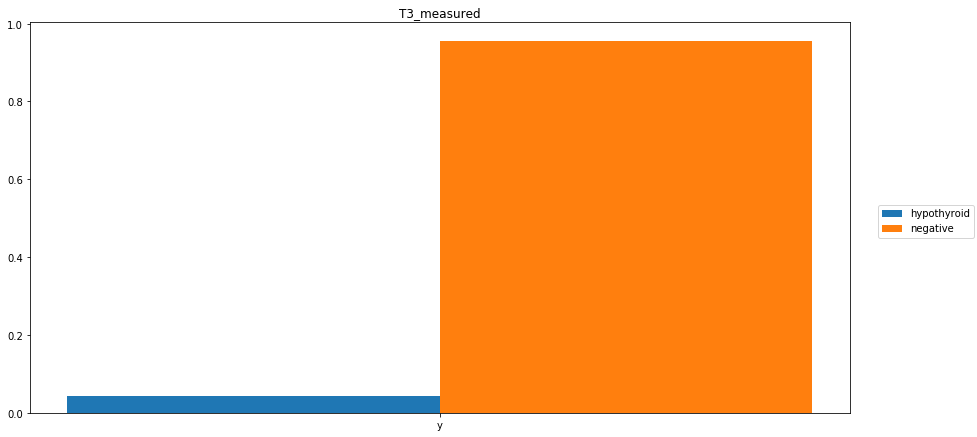

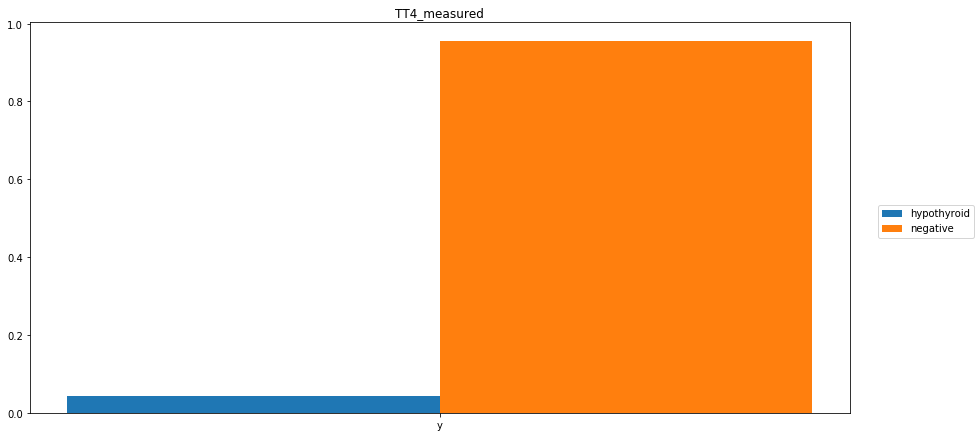

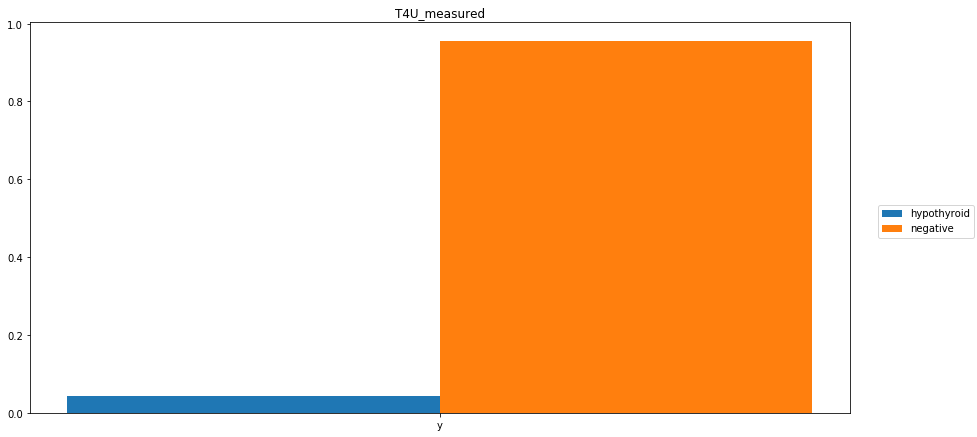

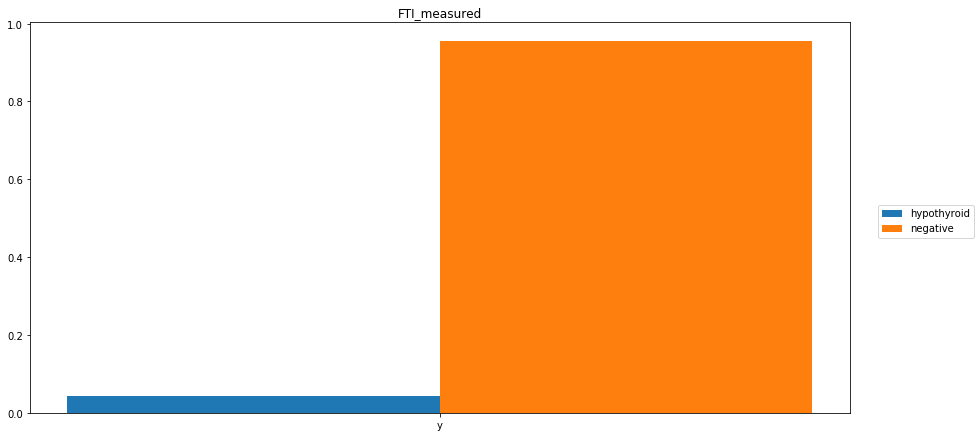

In [25]:
# Plotting proportion of patients with hypothyroidism for categorical variables
!pip install dexplot
import dexplot as dxp

cat_cols = df_svm.select_dtypes('object').drop(columns = 'status')

for i, col_val in enumerate(cat_cols):
  plt.figure(i)
  dxp.aggplot(col_val, data=df_svm, hue = 'status', normalize = col_val)
  plt.title(col_val)

From these plots, the patients that are most likely to be diagnosed with hypothyroidism have the following attributes: female, not on thyroxine, had thyroid surgery, hypothyroid positive, not pregnant, not sick, no tumour, no lithium, and goitre. 

<Figure size 720x1080 with 0 Axes>

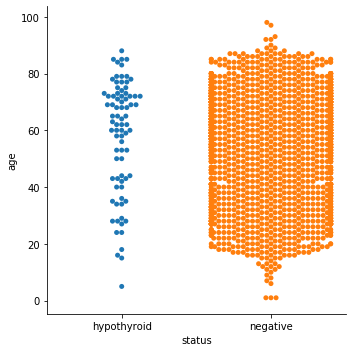

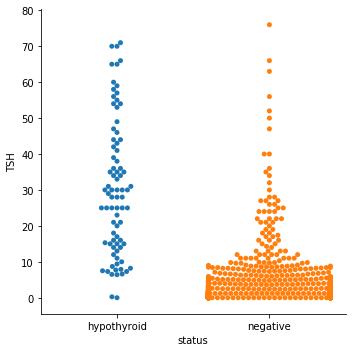

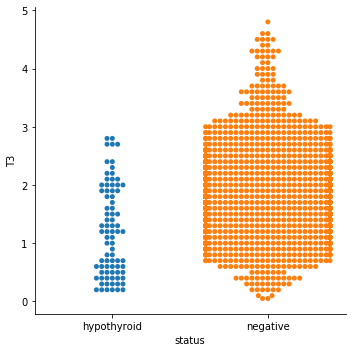

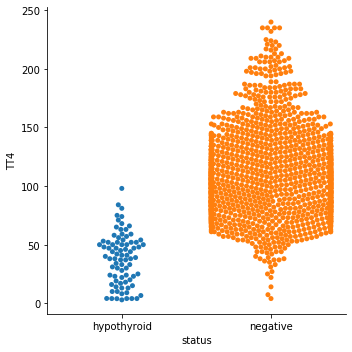

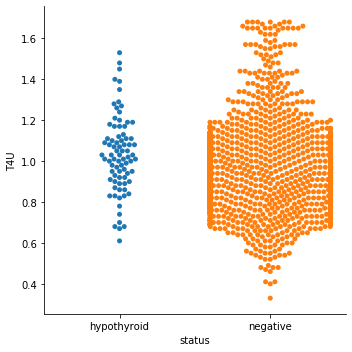

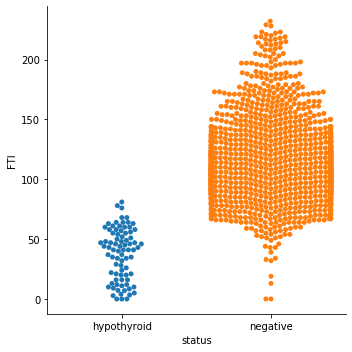

In [26]:
# Plotting hypothyroid status against numerical variables
num_cols = df_svm.select_dtypes('float64')

for i, col_val in enumerate(num_cols):
  plt.figure(i, figsize = (10, 15))
  sns.catplot(data = df_svm, x='status', y= col_val, hue = 'status', kind = 'swarm')

Based on numerical variables, the biggest indicators for hypothyroidism seem to below TT4, low FTI and low T3. Older patients are more likely to be diagnosed with hypothyroidism. Low TSH seems to be an indicator for a negative diagnosis.

## 7. Implementing the Solution

## Decision Trees

First, categorical data needs to be encoded to be used as input and output variables.

In [0]:
# Converting data types from object to category
data[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured',  'FTI_measured']] = data[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured',  'FTI_measured']].astype('category')

In [0]:
# Using label encoder on categorical columns
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({col: data[col].astype('category').cat.codes for col in data}, index=data.index)

Now a baseline decision tree model can be created and evaluated.
The data is not balanced, so F1 score is the best measure for evaluating model performance.

In [29]:
# Splitting the independent and dependent variables
y = data['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
X = data[test_features].values

# Training the model using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating a decision tree classifier
tree = DecisionTreeClassifier()

# Training the model on the training set.
tree = tree.fit(X_train, y_train)

# Making predictions based on the model
y_pred = tree.predict(X_test)

# Evaluating the model with the f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.99      0.99      0.99       887

    accuracy                           0.99       926
   macro avg       0.93      0.93      0.93       926
weighted avg       0.99      0.99      0.99       926



Visualizing the tree will show which features are potentially the best predictors of hypothyroidism.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


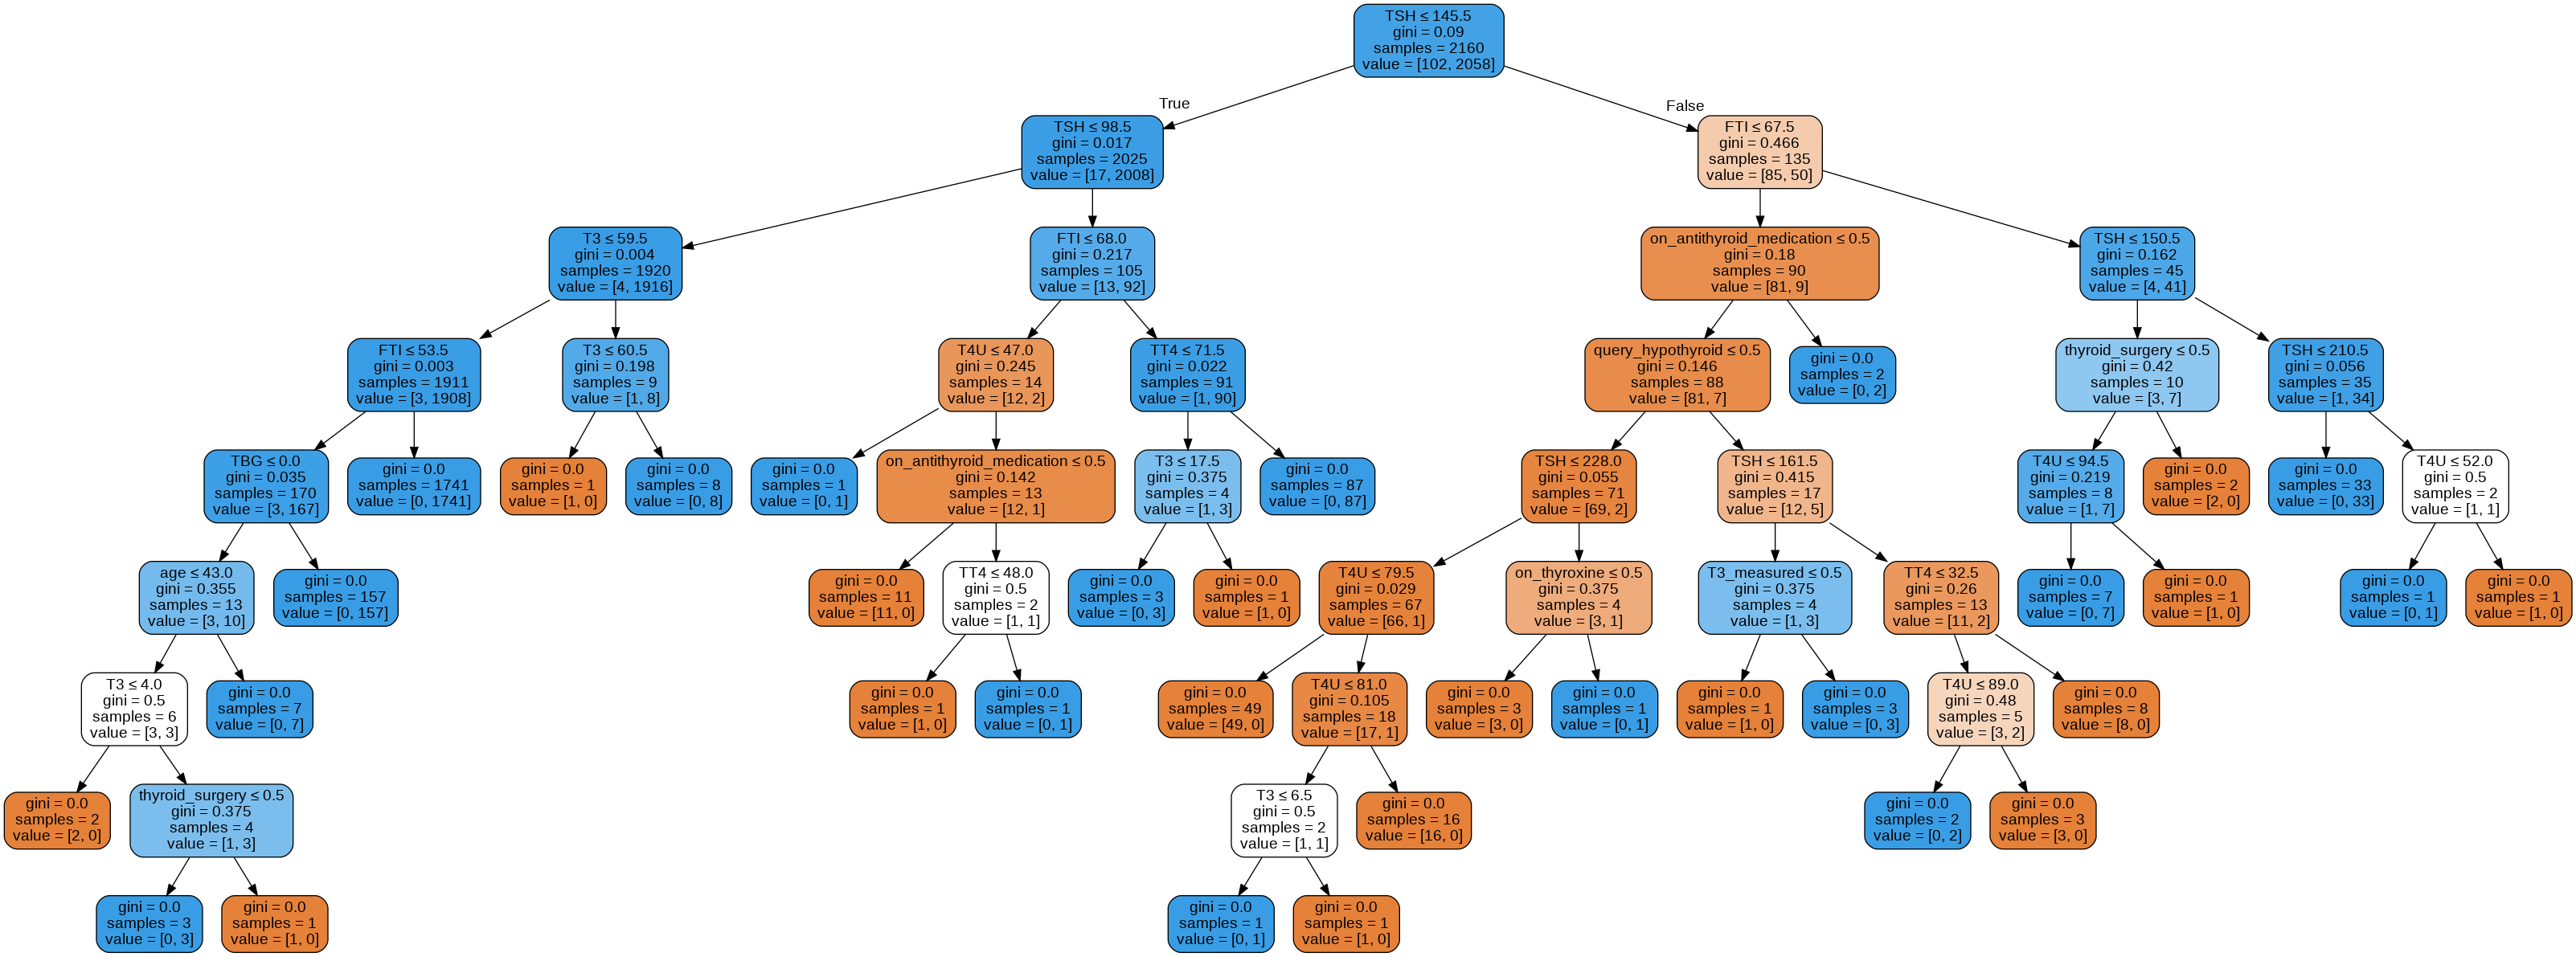

In [30]:
# Importing libraries for visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Visualizing the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism.png')
Image(graph.create_png())

In [31]:
# Getting numerical feature importances
importances = list(tree.feature_importances_)

# Listing tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sorting the list of values in descending order, to show the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the features and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.02), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.54), ('T3_measured', 0.01), ('T3', 0.03), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.04), ('FTI_measured', 0.0), ('FTI', 0.29), ('TBG_measured', 0.0), ('TBG', 0.01)]

Variable: TSH                  Importance: 0.54
Variable: FTI                  Importance: 0.29
Variable: T4U                  Importance: 0.04
Variable: T3                   Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.02
Variable: thyroid_surgery      Importance: 0.02
Variable: age                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3_measured          Importance: 0.

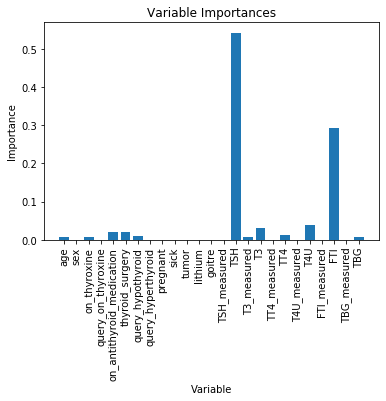

In [32]:
# Listing x locations for plotting
x_values = list(range(len(importances)))
# Plotting a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The tree and importances show that TSH and FTI may be the best predictors for hypothyroidism.
The F1 scores show that accuracy is different for the different classes, working with only one tree. Ensemble methods can be used to bridge this gap.
Here, random forest, AdaBoost and Gradient Boosting methods will be compared to optimize the model.

### Random Forest

In [33]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Fitting the random forest model to the data
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Making predictions based on the model we've trained
y_pred_forest = forest.predict(X_test)

# Evaluating the model with the f1 score
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.99      1.00      1.00       887

    accuracy                           0.99       926
   macro avg       0.97      0.93      0.95       926
weighted avg       0.99      0.99      0.99       926



The baseline random forest model has improved precision and recall for both classes, but there is still a disparity between predictions for the classes.

Using cross validation to find the ideal parameters for the random forest model:

In [34]:
# Creating a random grid for cross validation
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 210, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20, 30]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 20, 30],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
# Creating a parameter grid for cross validation based on the random grid
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10, 20, 30],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

In [36]:
# Finding the best parameters using randomized search cross validation
from sklearn.model_selection import RandomizedSearchCV
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = forest_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fitting the model to get the best parameters
random_search_f = forest_random.fit(X_train, y_train)
random_search_f.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   27.4s finished


{'bootstrap': False,
 'max_depth': 170,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [37]:
# Making predictions based on the model we've trained
best_forest_pred = random_search_f.predict(X_test)

# Evaluating the model with the f1 score
print(classification_report(y_test, best_forest_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       1.00      1.00      1.00       887

    accuracy                           1.00       926
   macro avg       0.98      0.96      0.97       926
weighted avg       1.00      1.00      1.00       926



The F1-score for hypothyroidism negative predictions have improved, so this model has been efficient in minimising prediction error.

In [38]:
# Getting numerical feature importances
forest_importances = list(random_search_f.best_estimator_.feature_importances_)

# Listing tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, forest_importances)]

print(feature_importances) 
print()

# Sorting the list of values in descending order, to show the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the features and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.02), ('TSH', 0.36), ('T3_measured', 0.01), ('T3', 0.03), ('TT4_measured', 0.01), ('TT4', 0.17), ('T4U_measured', 0.01), ('T4U', 0.05), ('FTI_measured', 0.01), ('FTI', 0.26), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.36
Variable: FTI                  Importance: 0.26
Variable: TT4                  Importance: 0.17
Variable: T4U                  Importance: 0.05
Variable: T3                   Importance: 0.03
Variable: age                  Importance: 0.02
Variable: TSH_measured         Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3_measured          Importance: 0

The importances can also be visualised in a bar chart.

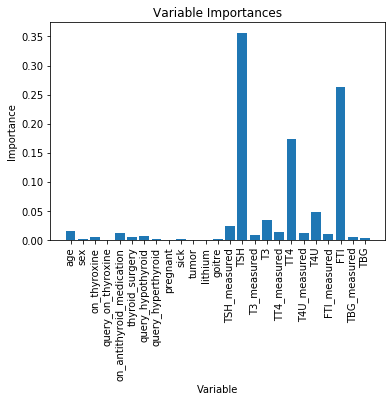

In [39]:
# Listing x locations for plotting
x_values = list(range(len(forest_importances)))
# Plotting a bar chart
plt.bar(x_values, forest_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

These feature impotance values confirm that the most important predictors in this model are TSH and FTI, and TT4 has also been shown to have an important effect on prediction. They are more balanced than the importances for the baseline model (most features are more equally contributing to the predicion).

### Boosting

### AdaBoost

In [40]:
# Importing libraries
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

# Evaluating the model with the f1 score
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.99      0.99      0.99       887

    accuracy                           0.98       926
   macro avg       0.91      0.89      0.90       926
weighted avg       0.98      0.98      0.98       926



This initial model scores poorly as compared to the baseline decision tree.

In [41]:
# Hyperparameter tuning to optimize the model

#Importing library
from sklearn.model_selection import GridSearchCV

# Setting the parameters to be cross validated
ABC_param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate' : [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1]
              }

# Cross validation with grid search
grid_search_ABC = GridSearchCV(ada_boost, ABC_param_grid ,cv=5)
best_ABC = grid_search_ABC.fit(X_train, y_train)

# Finding the best parameters
best_ABC.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [42]:
# Making predictions based on the model we've trained
best_ABC_pred = grid_search_ABC.predict(X_test)

# Evaluating the model with the f1 score
print(classification_report(y_test, best_ABC_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       1.00      1.00      1.00       887

    accuracy                           1.00       926
   macro avg       0.98      0.96      0.97       926
weighted avg       1.00      1.00      1.00       926



This score is higher than the score for the baseline decision tree, but not better than the random forest prediction.

In [43]:
# Getting numerical feature importances
abc_importances = list(grid_search_ABC.best_estimator_.feature_importances_)

# Listing tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, abc_importances)]

print(feature_importances) 
print()

# Sorting the list of values in descending order, to show the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the features and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.3), ('T3_measured', 0.0), ('T3', 0.12), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.08), ('FTI_measured', 0.0), ('FTI', 0.5), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: FTI                  Importance: 0.5
Variable: TSH                  Importance: 0.3
Variable: T3                   Importance: 0.12
Variable: T4U                  Importance: 0.08
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query

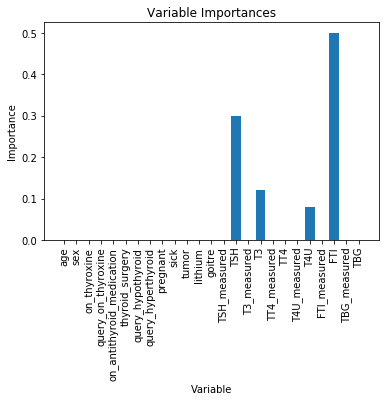

In [44]:
# Listing x locations for plotting
x_values = list(range(len(abc_importances)))
# Plotting a bar chart
plt.bar(x_values, abc_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

For this model, FTI is the most important predictor, followed by TSH, T3, and T4U. This prediction is not as accurate as the random forest and removes all other features. It may be useful for feature reduction.

In [45]:
# Creating a Gradient Boost model and training it on train data
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

# Evaluating the model with the f1 score
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       1.00      1.00      1.00       887

    accuracy                           0.99       926
   macro avg       0.96      0.96      0.96       926
weighted avg       0.99      0.99      0.99       926



This baseline model performs better than the initial decision tree, and better than the baseline AdaBoost model but slightly worse than random forest.

In [46]:
# Hyperparameter tuning to build the best model
gb_params = {
    "n_estimators":[50, 100, 250, 500],
    "max_depth":[1, 3, 5, 7, 9],
    "learning_rate":[0.01, 0.05, 0.1, 1]
    }

# Cross validation with grid search
grid_search_gb = GridSearchCV(gb, gb_params ,cv=5)
best_gb = grid_search_gb.fit(X_train, y_train)

# Finding the best parameters
best_gb.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 500}

In [47]:
# Making predictions based on the model we've trained
best_gb_pred = grid_search_gb.predict(X_test)

# Evaluating the model with the f1 score
print(classification_report(y_test, best_gb_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        39
           1       0.99      1.00      1.00       887

    accuracy                           0.99       926
   macro avg       0.98      0.92      0.95       926
weighted avg       0.99      0.99      0.99       926



The accuracy of prediction for the gradient boost model is worse than that of random forest and AdaBoost. It also decreased after parameter tuning so is not the best option for this prediction.

In [48]:
# Getting numerical feature importances
gb_importances = list(grid_search_gb.best_estimator_.feature_importances_)

# Listing tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, gb_importances)]

print(feature_importances) 
print()

# Sorting the list of values in descending order, to show the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the features and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.8), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.18), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.8
Variable: FTI                  Importance: 0.18
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnan

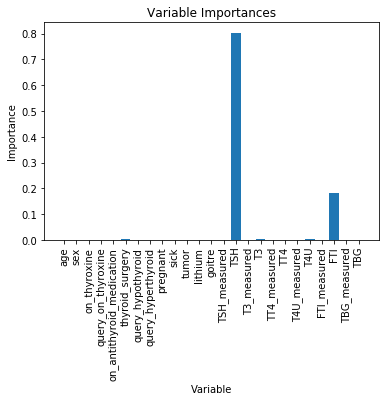

In [49]:
# Listing x locations for plotting
x_values = list(range(len(gb_importances)))
# Plotting a bar chart
plt.bar(x_values, gb_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The gradient boost model relies heavily on TSH and FTI values for prediction.

Random forest is the best model for diagnosing hypothyroidism. AdaBoost gives a simpler model which does not perform as well. Gradient boosting is not recommended for this model.
According to these models, the most important features for prediction are TSH, FTI, T4U, T3 and TT4.

## Support Vector Machine

### Linear SVM

In [0]:
# Converting data types from object to category
df_svm[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured',  'FTI_measured']] = df_svm[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured',  'FTI_measured']].astype('category')

In [51]:
# Checking that the data type has changed
df_svm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 3162
Data columns (total 24 columns):
status                       1834 non-null category
age                          1834 non-null float64
sex                          1834 non-null category
on_thyroxine                 1834 non-null category
query_on_thyroxine           1834 non-null category
on_antithyroid_medication    1834 non-null category
thyroid_surgery              1834 non-null category
query_hypothyroid            1834 non-null category
query_hyperthyroid           1834 non-null category
pregnant                     1834 non-null category
sick                         1834 non-null category
tumor                        1834 non-null category
lithium                      1834 non-null category
goitre                       1834 non-null category
TSH_measured                 1834 non-null category
TSH                          1834 non-null float64
T3_measured                  1834 non-null category
T3         

In [0]:
# Using label encoder on categorical columns
from sklearn.preprocessing import LabelEncoder
df_svm = pd.DataFrame({col: df_svm[col].astype('category').cat.codes for col in df_svm}, index=df_svm.index)

In [0]:
# Dropping columns that do not give new information
df_svm = df_svm.drop(columns =  ['TSH_measured', 'T3_measured','TT4_measured', 
       'T4U_measured', 'FTI_measured'])

Linear, polynomial, rbf, and sigmoid models will be created for the features TSH anf FTI, which were the most important in all the decision tree-based models.

In [54]:
# Importing libraries
from sklearn.svm import SVC
from sklearn.decomposition import PCA

y = data['status'].values

test_features = ['TSH', 'FTI']
X = data[test_features].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the model with a polynomial kernel 
linearclassifier = SVC(kernel='linear')

# Training the model using the training set
linearclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
# Making predictions
y_pred_linear = linearclassifier.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.99      1.00      0.99       887

    accuracy                           0.98       926
   macro avg       0.95      0.86      0.90       926
weighted avg       0.98      0.98      0.98       926



Now, the best parameters for this model will be selected.

In [56]:
# defining parameter range 
param_linear = {'C': [0.1, 1, 10, 100],  
              'gamma': [100, 10, 1, 0.1, 0.01], 
              'kernel': ['linear']}  
  
grid_linear = GridSearchCV(SVC(), param_linear, refit = True, verbose = 3) 
  
# fitting the model for grid search 
linear = grid_linear.fit(X_train, y_train) 

# print best parameter after tuning 
print(linear.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ..... C=0.1, gamma=100, kernel=linear, score=0.954, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ..... C=0.1, gamma=100, kernel=linear, score=0.954, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ..... C=0.1, gamma=100, kernel=linear, score=0.954, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ..... C=0.1, gamma=100, kernel=linear, score=0.951, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] ..... C=0.1, gamma=100, kernel=linear, score=0.951, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ...... C=0.1, gamma=10, kernel=linear, score=0.954, total=   0.0s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ...... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=10, kernel=linear, score=0.977, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.981, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.979, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV] ........ C=1, gamma=10, kernel=linear, score=0.986, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.984, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.977, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.981, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [57]:
# Making predictions for linear model
linear_predictions = linear.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, linear_predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.95      0.87      0.90       926
weighted avg       0.99      0.99      0.99       926



The score has improved from the basline model, but still not as much as random forest.

### Polynomial SVM

In [58]:
# Building the model with a polynomial kernel 
polyclassifier = SVC(kernel='poly')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
# Making predictions
y_pred_poly = polyclassifier.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.99      1.00      0.99       887

    accuracy                           0.98       926
   macro avg       0.95      0.86      0.90       926
weighted avg       0.98      0.98      0.98       926



In [60]:
# defining parameter range 
param_poly = {'C': [0.1, 1, 10, 100],  
              'gamma': [100, 10, 1, 0.1, 0.01], 
              'kernel': ['poly']}  
  
grid_poly = GridSearchCV(SVC(), param_poly, refit = True, verbose = 3) 
  
# fitting the model for grid search 
poly = grid_poly.fit(X_train, y_train) 

# print best parameter after tuning 
print(poly.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=100, kernel=poly ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=100, kernel=poly, score=0.988, total=   1.7s
[CV] C=0.1, gamma=100, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=100, kernel=poly, score=0.975, total=   1.8s
[CV] C=0.1, gamma=100, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=100, kernel=poly, score=0.981, total=   3.5s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] ....... C=0.1, gamma=100, kernel=poly, score=0.984, total=   1.7s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] ....... C=0.1, gamma=100, kernel=poly, score=0.984, total=   1.2s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.984, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.977, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.979, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] ........ C=0.1, gamma=10, kernel=poly, score=0.979, total=   0.0s
[CV] C=0.1, gamma=10, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 64.4min finished


{'C': 100, 'gamma': 100, 'kernel': 'poly'}


In [61]:
# Making predictions for linear model
poly_predictions = poly.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, poly_predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.96      0.87      0.91       926
weighted avg       0.99      0.99      0.99       926



The score has improved from the basline model, but still not as much as random forest.

### RBF SVM

In [62]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)
# Model Evaluation
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        39
           1       0.99      1.00      1.00       887

    accuracy                           0.99       926
   macro avg       0.98      0.92      0.95       926
weighted avg       0.99      0.99      0.99       926



In [64]:
# defining parameter range 
param_rbf = {'C': [0.1, 1, 10, 100],  
              'gamma': [100, 10, 1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid_rbf = GridSearchCV(SVC(), param_rbf, refit = True, verbose = 3) 
  
# fitting the model for grid search 
rbf = grid_rbf.fit(X_train, y_train) 

# print best parameter after tuning 
print(rbf.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.981, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.975, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.979, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.977, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=100, kernel=rbf, score=0.986, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.988, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.986, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.972, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.970, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.970, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.968, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


In [65]:
# Making predictions for linear model
rbf_predictions = rbf.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, rbf_predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       1.00      1.00      1.00       887

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



The score has improved from the basline model, but still not as much as random forest.

### Sigmoid SVM

In [66]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
# making prediction
y_pred_sigmoid = sigclassifier.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.96      1.00      0.98       887

    accuracy                           0.96       926
   macro avg       0.48      0.50      0.49       926
weighted avg       0.92      0.96      0.94       926



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# defining parameter range 
param_sigmoid = {'C': [0.1, 1, 10, 100],  
              'gamma': [100, 10, 1, 0.1, 0.01], 
              'kernel': ['sigmoid']}  
  
grid_sigmoid = GridSearchCV(SVC(), param_sigmoid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
sigmoid = grid_sigmoid.fit(X_train, y_train) 

# print best parameter after tuning 
print(sigmoid.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=100, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.954, total=   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.954, total=   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.954, total=   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.951, total=   0.0s
[CV] C=0.1, gamma=100, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=100, kernel=sigmoid, score=0.951, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.954, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] ..... C=0.1, gamma=10, kernel=sigmoid, score=0.954, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


In [69]:
# Making predictions for linear model
sigmoid_predictions = sigmoid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, sigmoid_predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.96      0.87      0.91       926
weighted avg       0.99      0.99      0.99       926



The score has improved from the basline model, but still not as much as random forest.

The best SVM model to answer this question is an rbf model.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



The data used in these models is heavily imbalanced, and hence a more balanced dataset may be more useful for this analysis.
The quality of the data was good, and the variables were the most important ones for prediction.

### b). Do we need other data to answer our question?

More data from hypothyroid-negative patients is needed to help create a more balanced model.

### c). Did we have the right question?

The question was appropriate for this analysis.